# Retail Sales Dashboard

This dashboard provides a high-level summary of retail sales performance, customer behavior, and product insights derived from the cleaned dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

df = pd.read_csv("../data/processed/cleaned_retail_sales.csv")
df["date"] = pd.to_datetime(df["date"])


## Key Performance Indicators (KPIs)

In [2]:
total_revenue = df["total_amount"].sum()
avg_transaction_value = df["total_amount"].mean()
total_transactions = df.shape[0]
unique_customers = df["customer_id"].nunique()

total_revenue, avg_transaction_value, total_transactions, unique_customers


(np.int64(456000), np.float64(456.0), 1000, 1000)

- **Total Revenue:** ₹{total_revenue:,.0f}
- **Average Transaction Value:** ₹{avg_transaction_value:,.2f}
- **Total Transactions:** {total_transactions}
- **Unique Customers:** {unique_customers}

## Monthly Revenue Trend

C:\Users\tathi\AppData\Local\Temp\ipykernel_17920\4276853033.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["total_amount"]


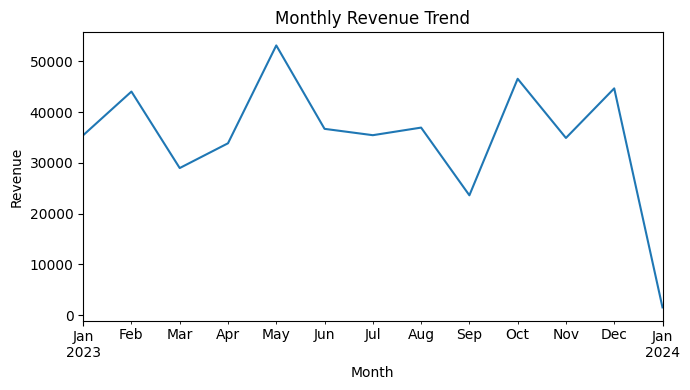

In [3]:
monthly_sales = (
    df.set_index("date")
      .resample("M")["total_amount"]
      .sum()
)

plt.figure(figsize=(7, 4))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## Revenue by Product Category

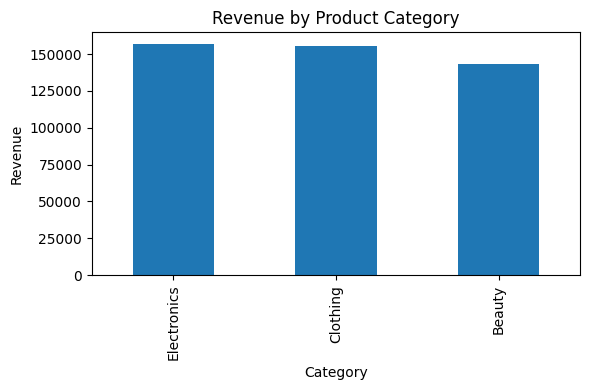

In [4]:
category_revenue = (
    df.groupby("product_category")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6, 4))
category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## Customer Demographics Overview

C:\Users\tathi\AppData\Local\Temp\ipykernel_17920\1538959514.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby("age_group")["total_amount"].sum()


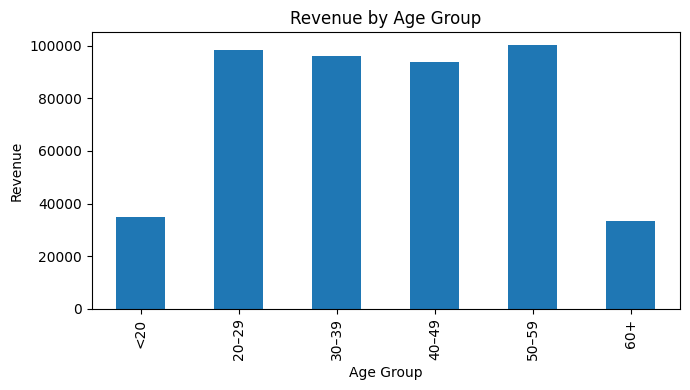

In [5]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["<20", "20–29", "30–39", "40–49", "50–59", "60+"]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)

age_revenue = df.groupby("age_group")["total_amount"].sum()

plt.figure(figsize=(7, 4))
age_revenue.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## Executive Summary

- Revenue is driven primarily by customers aged 30–49.
- Certain product categories consistently outperform others.
- A relatively small customer base contributes a significant share of total revenue.
- Seasonal patterns are visible in monthly sales trends.

This dashboard provides a concise overview for decision-makers to understand sales performance and customer behavior.
